In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data, parsing the dates & making date column as index column
covid = pd.read_csv(r"C:\Users\stave\OneDrive\Desktop\Bootcamp\Project1\ca_data_jul20-jul21.csv")
covid.head()

,date,county,state,cases,deaths
0,2020-07-01,Alameda,California,6177,136.0
1,2020-07-01,Alpine,California,1,0.0
2,2020-07-01,Amador,California,22,0.0
3,2020-07-01,Butte,California,189,2.0
4,2020-07-01,Calaveras,California,40,0.0


In [4]:
#sort data by county and date and put into order by date
covid2 = covid.sort_values(by= ['county','date'], ascending=[True, True])
covid2['date'] = pd.to_datetime(covid2['date'])
covid2

,date,county,state,cases,deaths
0,2020-07-01,Alameda,California,6177,136.0
57,2020-07-02,Alameda,California,6405,138.0
114,2020-07-03,Alameda,California,6493,140.0
171,2020-07-04,Alameda,California,6577,140.0
228,2020-07-05,Alameda,California,6876,140.0
...,...,...,...,...,...
20851,2021-06-25,Yuba,California,6526,51.0
20909,2021-06-26,Yuba,California,6526,51.0
20967,2021-06-27,Yuba,California,6526,51.0
21025,2021-06-28,Yuba,California,6529,51.0


In [5]:
#determine the day of the week data starts on
covid2['Week'] = covid2['date'].dt.day_name()
covid2

,date,county,state,cases,deaths,Week
0,2020-07-01,Alameda,California,6177,136.0,Wednesday
57,2020-07-02,Alameda,California,6405,138.0,Thursday
114,2020-07-03,Alameda,California,6493,140.0,Friday
171,2020-07-04,Alameda,California,6577,140.0,Saturday
228,2020-07-05,Alameda,California,6876,140.0,Sunday
...,...,...,...,...,...,...
20851,2021-06-25,Yuba,California,6526,51.0,Friday
20909,2021-06-26,Yuba,California,6526,51.0,Saturday
20967,2021-06-27,Yuba,California,6526,51.0,Sunday
21025,2021-06-28,Yuba,California,6529,51.0,Monday


In [6]:
#decrease data points down to only Wednesday
covid3 = covid2.loc[covid2['Week']=='Wednesday']
covid3

,date,county,state,cases,deaths,Week
0,2020-07-01,Alameda,California,6177,136.0,Wednesday
399,2020-07-08,Alameda,California,7266,142.0,Wednesday
798,2020-07-15,Alameda,California,8499,154.0,Wednesday
1197,2020-07-22,Alameda,California,9664,171.0,Wednesday
1596,2020-07-29,Alameda,California,10896,181.0,Wednesday
...,...,...,...,...,...,...
19111,2021-05-26,Yuba,California,6340,49.0,Wednesday
19517,2021-06-02,Yuba,California,6371,48.0,Wednesday
19923,2021-06-09,Yuba,California,6438,50.0,Wednesday
20329,2021-06-16,Yuba,California,6464,51.0,Wednesday


In [7]:
#calculate the number of new weekly cases and deaths for each county
for case in 'cases': 
    covid3['Weekly Cases']= covid3['cases'].diff(1)
covid3.loc[covid3['date'] == '2020-07-01', 'Weekly Cases'] = 0
for death in 'deaths':    
    covid3['Weekly Deaths']= covid3['deaths'].diff(1)
covid3.loc[covid3['date'] == '2020-07-01', 'Weekly Deaths'] = 0
print(covid3)
#covid3.to_csv(r"C:\Users\stave\OneDrive\Desktop\Bootcamp\Project1\covid3.csv")


            date   county       state  cases  deaths       Week  Weekly Cases  \
0     2020-07-01  Alameda  California   6177   136.0  Wednesday           0.0   
399   2020-07-08  Alameda  California   7266   142.0  Wednesday        1089.0   
798   2020-07-15  Alameda  California   8499   154.0  Wednesday        1233.0   
1197  2020-07-22  Alameda  California   9664   171.0  Wednesday        1165.0   
1596  2020-07-29  Alameda  California  10896   181.0  Wednesday        1232.0   
...          ...      ...         ...    ...     ...        ...           ...   
19111 2021-05-26     Yuba  California   6340    49.0  Wednesday          40.0   
19517 2021-06-02     Yuba  California   6371    48.0  Wednesday          31.0   
19923 2021-06-09     Yuba  California   6438    50.0  Wednesday          67.0   
20329 2021-06-16     Yuba  California   6464    51.0  Wednesday          26.0   
20735 2021-06-23     Yuba  California   6519    51.0  Wednesday          55.0   

       Weekly Deaths  
0   

C:\Users\stave\AppData\Local\Temp\ipykernel_4572\1253319595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid3['Weekly Cases']= covid3['cases'].diff(1)
C:\Users\stave\AppData\Local\Temp\ipykernel_4572\1253319595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid3['Weekly Deaths']= covid3['deaths'].diff(1)


In [8]:
#creat a new data frame with new columns for weekly cases and deaths

total = covid3[['Weekly Cases','Weekly Deaths', 'county', 'date']]

total

,Weekly Cases,Weekly Deaths,county,date
0,0.0,0.0,Alameda,2020-07-01
399,1089.0,6.0,Alameda,2020-07-08
798,1233.0,12.0,Alameda,2020-07-15
1197,1165.0,17.0,Alameda,2020-07-22
1596,1232.0,10.0,Alameda,2020-07-29
...,...,...,...,...
19111,40.0,0.0,Yuba,2021-05-26
19517,31.0,-1.0,Yuba,2021-06-02
19923,67.0,2.0,Yuba,2021-06-09
20329,26.0,1.0,Yuba,2021-06-16


In [9]:
#pivot so columns reflect county and rows are weeks and number of cases
total2 = total.pivot(index='date', columns='county', values='Weekly Cases')
total2

county,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-08,1089.0,0.0,11.0,106.0,21.0,39.0,993.0,7.0,96.0,1992.0,...,290.0,1523.0,126.0,20.0,0.0,975.0,24.0,896.0,205.0,60.0
2020-07-15,1233.0,0.0,13.0,142.0,14.0,42.0,899.0,3.0,83.0,1660.0,...,460.0,1530.0,131.0,28.0,0.0,1034.0,22.0,958.0,263.0,77.0
2020-07-22,1165.0,1.0,17.0,246.0,21.0,102.0,1070.0,18.0,123.0,2471.0,...,262.0,1353.0,113.0,27.0,0.0,1271.0,29.0,1181.0,202.0,88.0
2020-07-29,1232.0,0.0,45.0,200.0,12.0,62.0,1504.0,9.0,103.0,2521.0,...,507.0,1508.0,164.0,49.0,1.0,1473.0,23.0,914.0,252.0,122.0
2020-08-05,1261.0,0.0,46.0,146.0,28.0,55.0,610.0,2.0,113.0,2339.0,...,460.0,867.0,150.0,27.0,2.0,1002.0,12.0,1089.0,159.0,112.0
2020-08-12,1963.0,0.0,42.0,276.0,25.0,38.0,1779.0,14.0,91.0,2072.0,...,651.0,2233.0,160.0,63.0,0.0,1565.0,15.0,819.0,282.0,135.0
2020-08-19,1737.0,0.0,20.0,189.0,20.0,24.0,1783.0,8.0,84.0,2972.0,...,920.0,1343.0,145.0,35.0,3.0,1193.0,7.0,537.0,200.0,133.0
2020-08-26,1549.0,0.0,13.0,250.0,42.0,13.0,1373.0,9.0,58.0,2616.0,...,643.0,951.0,139.0,70.0,2.0,837.0,23.0,823.0,156.0,72.0


In [11]:
#pivot so columns reflect county and rows are weeks and number of deaths
total3 = total.pivot(index='date', columns='county', values='Weekly Deaths')
total3

county,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-08,6.0,0.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,9.0,...,5.0,6.0,1.0,0.0,0.0,20.0,0.0,4.0,4.0,2.0
2020-07-15,12.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,7.0,...,2.0,11.0,0.0,0.0,0.0,5.0,0.0,6.0,2.0,0.0
2020-07-22,17.0,0.0,0.0,1.0,1.0,2.0,10.0,0.0,1.0,13.0,...,6.0,16.0,0.0,0.0,0.0,15.0,0.0,7.0,5.0,0.0
2020-07-29,10.0,0.0,0.0,2.0,0.0,1.0,7.0,0.0,0.0,16.0,...,9.0,26.0,2.0,0.0,0.0,5.0,2.0,10.0,6.0,1.0
2020-08-05,12.0,0.0,0.0,1.0,0.0,1.0,22.0,0.0,0.0,37.0,...,11.0,42.0,0.0,0.0,0.0,20.0,0.0,6.0,1.0,0.0
2020-08-12,19.0,0.0,10.0,0.0,0.0,1.0,18.0,0.0,1.0,34.0,...,9.0,37.0,1.0,0.0,0.0,12.0,0.0,14.0,3.0,0.0
2020-08-19,16.0,0.0,3.0,6.0,0.0,0.0,9.0,1.0,0.0,14.0,...,14.0,30.0,0.0,0.0,0.0,3.0,0.0,5.0,2.0,0.0
2020-08-26,15.0,0.0,1.0,7.0,1.0,1.0,14.0,0.0,0.0,34.0,...,10.0,28.0,1.0,0.0,0.0,16.0,0.0,9.0,2.0,2.0


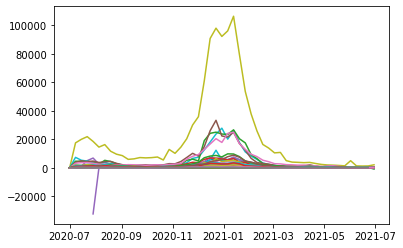

In [36]:
#create graph for all new cases per county
plt.plot(total2)
plt.show()


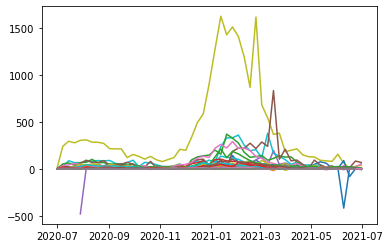

In [14]:
#create graph for all new deaths per county
plt.plot(total3)
plt.show()

In [52]:
#create dataframe for top 5 county new cases
top5c = total2[['Los Angeles', 'San Diego', 'Riverside', 'San Bernardino', 'Orange']]
top5c

county,Los Angeles,San Diego,Riverside,San Bernardino,Orange
date,,,,,
2020-07-01,0.0,0.0,0.0,0.0,0.0
2020-07-08,17497.0,3219.0,4623.0,3840.0,7328.0
2020-07-15,20005.0,3604.0,4571.0,4882.0,5290.0
2020-07-22,21861.0,3661.0,4381.0,4307.0,4712.0
2020-07-29,18513.0,3180.0,4227.0,4718.0,3529.0
2020-08-05,14529.0,2577.0,2533.0,3744.0,2859.0
2020-08-12,16285.0,2529.0,5246.0,4230.0,3692.0
2020-08-19,11630.0,1983.0,4393.0,4480.0,2684.0
2020-08-26,9559.0,1846.0,2908.0,3104.0,2583.0


C:\Users\stave\AppData\Local\Temp\ipykernel_4572\3720675339.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  top5cases = top5c[{'Los Angeles': 'LA', 'San Diego':'SD', 'Riverside':'RV','San Bernardino': 'SB', 'Orange': 'O'}]


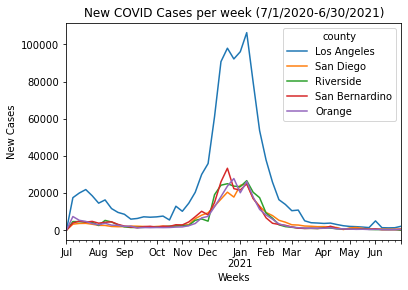

In [58]:
#create graph for tops 5 county new cases 
top5cases = top5c[{'Los Angeles': 'LA', 'San Diego':'SD', 'Riverside':'RV','San Bernardino': 'SB', 'Orange': 'O'}]
top5cases.plot()
plt.xlabel("Weeks")
plt.ylabel("New Cases")
plt.title("New COVID Cases per week (7/1/2020-6/30/2021)")
plt.savefig("NewCasesperWeek.png")
plt.show()

In [42]:
#create dataframe for top 5 county new deaths
top5d = total3[['Los Angeles', 'San Diego', 'Riverside', 'San Bernardino', 'Orange']]
top5d

county,Los Angeles,San Diego,Riverside,San Bernardino,Orange
date,,,,,
2020-07-01,0.0,0.0,0.0,0.0,0.0
2020-07-08,240.0,34.0,52.0,35.0,24.0
2020-07-15,294.0,42.0,62.0,17.0,86.0
2020-07-22,277.0,57.0,40.0,27.0,66.0
2020-07-29,303.0,47.0,65.0,58.0,66.0
2020-08-05,309.0,26.0,70.0,92.0,78.0
2020-08-12,284.0,30.0,101.0,68.0,80.0
2020-08-19,283.0,30.0,64.0,66.0,88.0
2020-08-26,271.0,30.0,67.0,88.0,85.0


C:\Users\stave\AppData\Local\Temp\ipykernel_4572\1297854708.py:1: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  top5deaths = top5d[{'Los Angeles': 'LA', 'San Diego':'SD', 'Riverside':'RV','San Bernardino': 'SB', 'Orange': 'O'}]


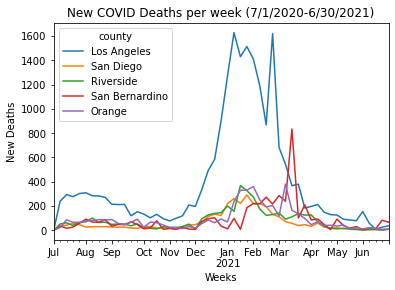

In [59]:
#create graph for top 5 county new deaths
top5deaths = top5d[{'Los Angeles': 'LA', 'San Diego':'SD', 'Riverside':'RV','San Bernardino': 'SB', 'Orange': 'O'}]
top5deaths.plot()
plt.xlabel("Weeks")
plt.ylabel("New Deaths")
plt.title("New COVID Deaths per week (7/1/2020-6/30/2021)")
plt.savefig("NewDeathsperWeek.png")
plt.show()